In [ ]:
#Ubrukt innlesningskode som ikke atm funker. 
image = Image.open(f"{folder}/{i}/{file}")
y.append(int(i[-3:])
image = image.convert('RGB')
image = image.resize(IMAGE_SIZE)
x.append(np.array(image))

In [22]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import numpy as np

IMAGE_SIZE = (200,200)

x = []
y = []

folder = './face_age'
set = os.listdir(folder)
num_classes = 0

for i in set:
    num_classes += 1
    for file in os.listdir(f"{folder}/{i}"):
        image = Image.open(f"{folder}/{i}/{file}")
        y.append(int(i[-3:]))
        x.append(keras.preprocessing.image.img_to_array(image))
print(f"Det er {num_classes} klasser")
print(len(x))
print(len(y))

Det er 99 klasser
9778
9778


In [23]:
x = np.array(x)
y = np.array(y)
x = x.astype('float32')
x /= 255.0
print('Min: %.3f, Max: %.3f' % (x.min(), x.max()))

Min: 0.000, Max: 1.000


86


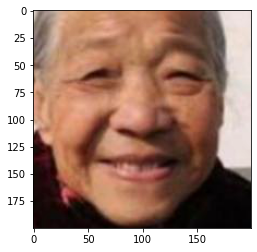

In [24]:
import matplotlib.pyplot as plt
#Se et tilfeldig bilde sammen med alder slik at innlesing stemmer
test = tf.keras.preprocessing.image.array_to_img(x[6300])
plt.imshow(test)
print(y[6300])

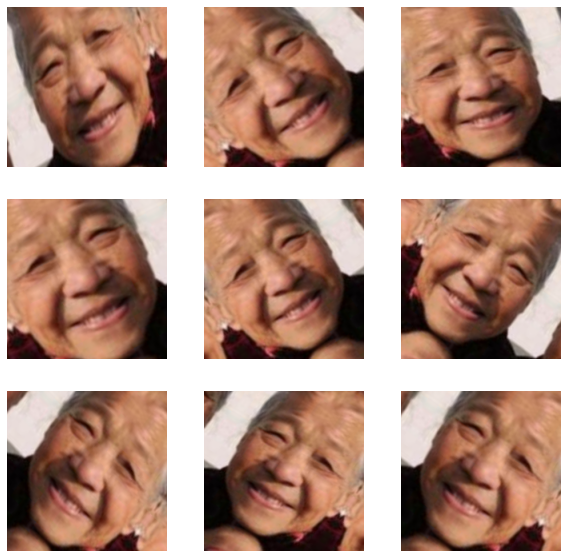

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode='reflect',
    horizontal_flip = True)

test = x[6300]
test = test.reshape((1,) + test.shape)
i = 0
plt.figure(figsize=(10, 10))
for batch in datagen.flow(test, batch_size=1):
    if i >= 9:
        break
    image = batch[0,:,:,:]
    x = tf.keras.preprocessing.image.array_to_img(image)
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(x)
    plt.axis("off")
    i += 1
    

In [26]:
from tensorflow.keras import layers
def build_model():
    model = keras.Sequential()
    model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(200, 200, 3)))
    model.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes,activation="linear")) 
    return model

model = build_model()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 99, 99, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 313632)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 99)                31049667  
Total params: 31,050,563
Trainable params: 31,050,563
Non-trainable params: 0
_________________________________________________________________


In [27]:
epochs = 50
batch_size = 128

In [28]:
model = build_model()

model.compile(optimizer="adam",loss="mean_absolute_error",metrics=['mean_absolute_error'])

model_history = model.fit(
            x,
            y,
            batch_size= batch_size,
            epochs = epochs,
            verbose=True)

ValueError: Failed to find data adapter that can handle input: <class 'PIL.Image.Image'>, <class 'numpy.ndarray'>